## Initial Imports

In [ ]:
!pip install pandas numpy matplotlib pandas polars scipy

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import sparse
import matplotlib.animation as animation
import os
import time

from typing import Tuple

from collections import namedtuple
import polars as pl

from datetime import date, timedelta, datetime, timezone

%load_ext autoreload
%autoreload 2

from v3 import state

from matplotlib import font_manager

font_files = font_manager.findSystemFonts(fontpaths=None, fontext="ttf")

for font_file in font_files:
    try:
        font_manager.fontManager.addfont(font_file)
    except Exception as e:
        pass

## Setting up the data connectors

### If you're using Allium (recommended)


In [ ]:
# add your credentials here
# os.environ['ALLIUM_POLARSV3_QUERY_ID'] = 'abcdefg'
# os.environ['ALLIUM_POLARSV3_API_KEY'] = 'deadbeef'

update_from_source = "allium"

### If you're using BigQuery
(uncomment the lines in this section)

In [ ]:
# !pip install google-cloud-bigquery

In [ ]:
# from google.cloud import bigquery

# update_from_source = "gbq"

## Usage

In [2]:
# read into all of the chain values and initialize their constructors
starting = datetime(year = 2023, month = 11, day = 1)

address = '0x85149247691df622eaf1a8bd0cafd40bc45154a9'
op = state.v3Pool(address, 'optimism', update = True, update_from=update_from_source)
priceOp = op.getPriceSeries(starting)

address = '0xc31e54c7a869b9fcbecc14363cf510d1c41fa443'
arb = state.v3Pool(address, 'arbitrum', update = True, update_from=update_from_source)
priceArb = arb.getPriceSeries(starting)

address = '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640'
eth = state.v3Pool(address, 'ethereum', update = True, update_from=update_from_source)
priceEth = eth.getPriceSeries(starting)

address = '0x45dda9cb7c25131df268515131f647d726f50608'
polygon = state.v3Pool(address, 'polygon', update = True, update_from=update_from_source)
pricePoly = polygon.getPriceSeries(starting)

Starting table uniswap_v3_factory_pool_created_events_combined
Found 191 to 112867947
Found data
Updated to 111531907 to 112867947
Starting at 111531907
Going from 111531907 to 112867947
Starting table uniswap_v3_pool_swap_events_combined
Found 201 to 112927404
Found data
Updated to 111593605 to 112927404
Starting at 111593605
Going from 111593605 to 112460324
Starting at 112460325
Going from 112460325 to 112927404
Starting table uniswap_v3_pool_mint_burn_events_combined
Found 200 to 112895006
Found data
Updated to 111555757 to 112895006
Starting at 111555757
Going from 111555757 to 112895006
Starting table uniswap_v3_pool_initialize_events_combined
Found 191 to 112867947
Found data
Updated to 111531907 to 112867947
Starting at 111531907
Going from 111531907 to 112867947
Chain = optimism - Start pulling the ovm1
Starting table uniswap_v3_factory_pool_created_events_combined
Found 27471 to 2759474
Found data
Updated to 2759475 to 2759474
Nothing to update
Starting table uniswap_v3_pool_

PARTITIONED DS: estimated cardinality: 1 exceeded the boundary: 0.4, running default HASH AGGREGATION
PARTITIONED DS: estimated cardinality: 1 exceeded the boundary: 0.4, running default HASH AGGREGATION


Starting table uniswap_v3_factory_pool_created_events_combined
Found 185 to 155917865
Found data
Updated to 150340965 to 155917865
Starting at 150340965
Going from 150340965 to 155917865
Starting table uniswap_v3_pool_swap_events_combined
Found 188 to 155926534
Found data
Updated to 150360101 to 155926534
Starting at 150360101
Going from 150360101 to 154073840
Starting at 154073841
Going from 154073841 to 155926534
Starting table uniswap_v3_pool_mint_burn_events_combined
Found 185 to 155687981
Found data
Updated to 150151935 to 155687981
Starting at 150151935
Going from 150151935 to 155687981
Starting table uniswap_v3_pool_initialize_events_combined
Found 185 to 155631123
Found data
Updated to 150103934 to 155631123
Starting at 150103934
Going from 150103934 to 155631123


PARTITIONED DS: estimated cardinality: 1 exceeded the boundary: 0.4, running default HASH AGGREGATION
PARTITIONED DS: estimated cardinality: 1 exceeded the boundary: 0.4, running default HASH AGGREGATION


Starting table uniswap_v3_factory_pool_created_events_combined
Found 12369739 to 18693207
Found data
Updated to 18571084 to 18693207
Starting at 18571084
Going from 18571084 to 18693207
Starting table uniswap_v3_pool_swap_events_combined
Found 12369879 to 18693211
Found data
Updated to 18571197 to 18693211
Starting at 18571197
Going from 18571197 to 18693211
Starting table uniswap_v3_pool_mint_burn_events_combined
Found 12369739 to 18687850
Found data
Updated to 18566417 to 18687850
Starting at 18566417
Going from 18566417 to 18687850
Starting table uniswap_v3_pool_initialize_events_combined
Found 12369739 to 18686384
Found data
Updated to 18565153 to 18686384
Starting at 18565153
Going from 18565153 to 18686384


PARTITIONED DS: estimated cardinality: 1 exceeded the boundary: 0.4, running default HASH AGGREGATION
PARTITIONED DS: estimated cardinality: 1 exceeded the boundary: 0.4, running default HASH AGGREGATION


Starting table uniswap_v3_factory_pool_created_events_combined
Found 22757913 to 50621678
Found data
Updated to 49060643 to 50621678
Starting at 49060643
Going from 49060643 to 50621678
Starting table uniswap_v3_pool_swap_events_combined
Found 22765731 to 50621868
Found data
Updated to 49061920 to 50621868
Starting at 49061920
Going from 49061920 to 49434648
Starting at 49434649
Going from 49434649 to 49789741
Starting at 49789742
Going from 49789742 to 50030111
Starting at 50030112
Going from 50030112 to 50360693
Starting at 50360694
Going from 50360694 to 50621868
Starting table uniswap_v3_pool_mint_burn_events_combined
Found 22762450 to 50591739
Found data
Updated to 49036818 to 50591739
Starting at 49036818
Going from 49036818 to 50591739
Starting table uniswap_v3_pool_initialize_events_combined
Found 22762313 to 50584030
Found data
Updated to 49028786 to 50584030
Starting at 49028786
Going from 49028786 to 50584030


PARTITIONED DS: estimated cardinality: 1 exceeded the boundary: 0.4, running default HASH AGGREGATION
PARTITIONED DS: estimated cardinality: 1 exceeded the boundary: 0.4, running default HASH AGGREGATION


In [3]:
import matplotlib.pylab as pylab
# create the matplotlib params
params = {'font.family': 'Inter',
          'font.size': 16,
          'axes.facecolor': '#FAF9F6',
          'savefig.facecolor': '#FAF9F6'
         }

pylab.rcParams.update(params)

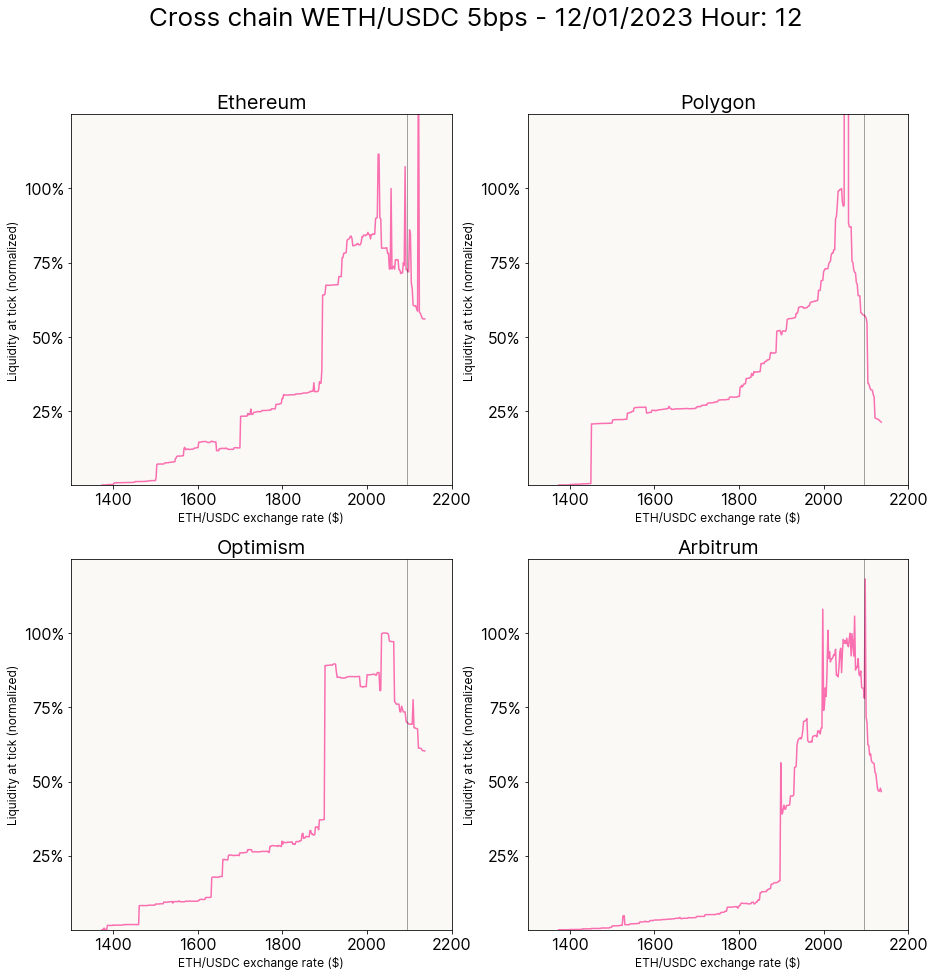

In [4]:
fig, ((ax1,ax2),(ax3,ax4))= plt.subplots(2, 2, figsize = (15, 15))

axes = (ax1, ax2, ax3, ax4)

line1, = ax1.plot([],[], '-', color = "#FA3492", alpha = .7)
line2, = ax2.plot([],[], '-', color = "#FA3492", alpha = .7)
line3, = ax3.plot([],[], '-', color = "#FA3492", alpha = .7)
line4, = ax4.plot([],[], '-', color = "#FA3492", alpha = .7)

# matplotlib animations struggle with the y/x axis changing, so
# we place it before anything else
tick_low, tick_high = (-204079, -199644)
price_high = (((1.0001 ** int(tick_high) * 1e12) // 100) + 1) * 100
price_low = ((1.0001 ** int(tick_low) * 1e12) // 100) * 100

for ax in axes:
    ax.set_xlim(price_low, price_high)
    ax.set_ylim(0, 1.25)
    ax.set_xlabel("ETH/USDC exchange rate ($)", fontfamily='Inter', fontsize = 12)
    ax.set_ylabel("Liquidity at tick (normalized)", fontfamily='Inter', fontsize = 12)

vl1 = ax1.axvline(0, ls = '-', linewidth = .5, color = "black", linestyle = "--", alpha = .7)
vl2 = ax2.axvline(0, ls = '-', linewidth = .5, color = "black", linestyle = "--", alpha = .7)
vl3 = ax3.axvline(0, ls = '-', linewidth = .5, color = "black", linestyle = "--", alpha = .7)
vl4 = ax4.axvline(0, ls = '-', linewidth = .5, color = "black", linestyle = "--", alpha = .7)
    
def init(): 
    vl1.set_data([],[])
    vl2.set_data([],[])
    vl3.set_data([],[])
    vl4.set_data([],[])
    return 

def animate(i, prices, pools, axes):
    try:
        for num in range(len(prices)):
            price = prices[num]
            row = price.slice(i, 1)
            ts = row['block_timestamp'].item()
            tick = row['tick']
            bn = row['block_number']

            pool = pools[num]
            liq = pool.createLiq(bn)

            if num == 0 or num == 1:
                tick_low, tick_high = (199644, 204079)
                price_low, price_high = 1.0001**tick_low, 1.0001**tick_high

                liq = (pool.createLiq(bn)
                    .filter((pl.col('tick') >= tick_low) & 
                                ((pl.col('tick') <= tick_high))
                       )
                    .with_columns(price = 1 / ((1.0001 ** pl.col('tick'))) * 1e12)
                  )
                cur_px = 1 / ((1.0001 ** tick)) * 1e12

            else:
                tick_low, tick_high = (-204079, -199644)
                price_low, price_high = 1.0001**tick_low, 1.0001**tick_high

                liq = (pool.createLiq(bn)
                        .filter((pl.col('tick') >= tick_low) & 
                                    ((pl.col('tick') <= tick_high))
                           )
                        .with_columns(price = (1.0001 ** pl.col('tick') * 1e12))
                  )
                cur_px = (1.0001 ** tick) * 1e12

            max_liq = liq.select('liquidity').with_columns(liquidity = pl.col('liquidity').quantile(.99)).max().item()
            min_liq = liq.select('liquidity').min().item()
            
            liq = (liq.with_columns(liquidity = (pl.col('liquidity') - min_liq) / (max_liq - min_liq)))

            # the pool is inverted so we flip it to get weth/usdc price
            if num == 0:
                line1.set_xdata(liq['price'])
                line1.set_ydata(liq['liquidity'])
                vl1.set_xdata([cur_px, cur_px])
            elif num == 1:
                line2.set_xdata(liq['price'])
                line2.set_ydata(liq['liquidity'])
                vl2.set_xdata([cur_px, cur_px])
            elif num == 2:
                line3.set_xdata(liq['price'])
                line3.set_ydata(liq['liquidity'])
                vl3.set_xdata([cur_px, cur_px])
            elif num == 3:
                line4.set_xdata(liq['price'])
                line4.set_ydata(liq['liquidity'])
                vl4.set_xdata([cur_px, cur_px])

        ax1.set_title("Ethereum", fontfamily='Inter', fontsize = 20)
        ax2.set_title("Polygon", fontfamily='Inter', fontsize = 20)
        ax3.set_title("Optimism", fontfamily='Inter', fontsize = 20)
        ax4.set_title("Arbitrum", fontfamily='Inter', fontsize = 20)
        
        ax1.set_yticks([.25, .5, .75, 1],
                  labels=['25%', '50%', '75%', '100%'])
        ax2.set_yticks([.25, .5, .75, 1],
                  labels=['25%', '50%', '75%', '100%'])
        ax3.set_yticks([.25, .5, .75, 1],
                  labels=['25%', '50%', '75%', '100%'])
        ax4.set_yticks([.25, .5, .75, 1],
                  labels=['25%', '50%', '75%', '100%'])
                
        plt.suptitle(ts.strftime("Cross chain WETH/USDC 5bps - %m/%d/%Y Hour: %H"),
                     fontfamily='Inter', fontsize = 26)

        return line1,line2,line3,line4, vl1,vl2,vl3,vl4
    except Exception as e:
        return line1,line2,line3,line4, vl1,vl2,vl3,vl4

frames = priceEth.shape[0]
ani = animation.FuncAnimation(fig, animate, frames=frames, fargs=((priceEth, pricePoly, 
                                                                   priceOp, priceArb), (eth, polygon,
                                                                                        op, arb), axes),
                              interval=100, blit=True)
write = True
if write:
    f = "assets/animation.gif" 
    writergif = animation.PillowWriter(fps=15) 
    ani.save(f, writer=writergif)